# Case study on unsupervised learning

In [1]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from warnings import filterwarnings
filterwarnings('ignore')

## Loading the Dataset

In [2]:
data=pd.read_csv('Wine_clust.csv')

## Checking the Basic details of the dataset

In [3]:
data.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [4]:
data.shape

(178, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

In [7]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

### Checking for null values in the Dataset

In [8]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

#### There are no null values in the dataset

### Checking for duplicates in dataset

In [9]:
data.duplicated().sum()

0

#### There are no duplicates in the dataset

## Exploratory Data analysis

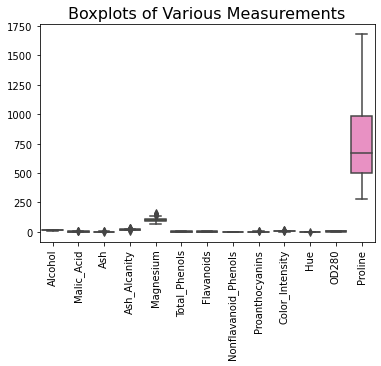

In [10]:
sns.boxplot(data=data)
plt.title('Boxplots of Various Measurements',fontsize=16)
plt.xticks(rotation=90)
plt.show()

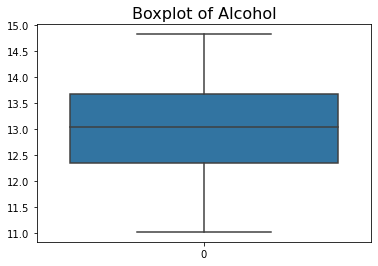

In [11]:
sns.boxplot(data=data['Alcohol'])
plt.title('Boxplot of Alcohol',fontsize=16)
plt.show()

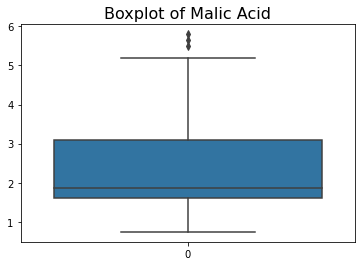

In [12]:
sns.boxplot(data=data['Malic_Acid'])
plt.title('Boxplot of Malic Acid',fontsize=16)
plt.show()

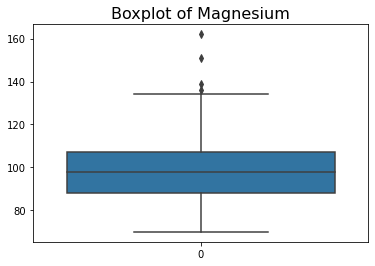

In [13]:
sns.boxplot(data=data['Magnesium'])
plt.title('Boxplot of Magnesium',fontsize=16)
plt.show()

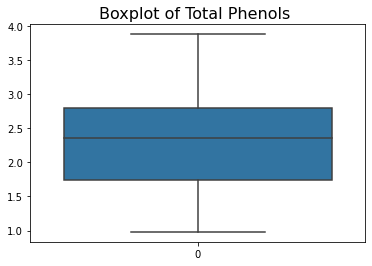

In [14]:
sns.boxplot(data=data['Total_Phenols'])
plt.title('Boxplot of Total Phenols ',fontsize=16)
plt.show()

### Even Though Dataset contains outliers we cannot drop it as the dataset is a smaller one. Also to better understand the DB scan which treats outliers as noise it is better to include outliers in dataset

### Checking for correlation in the data

In [15]:
corrmatrix=data.corr()

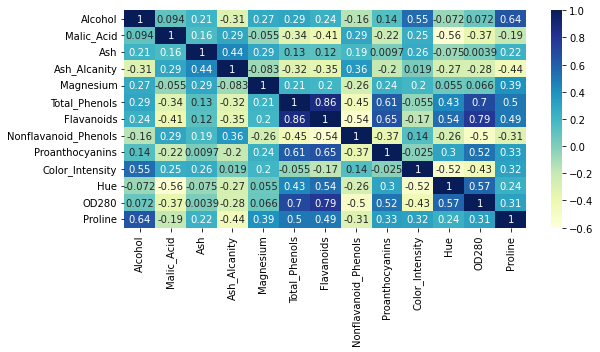

In [16]:
plt.subplots(figsize=(9,4))
sns.heatmap(corrmatrix,vmin=-0.6, vmax= 1,annot=True,cmap='YlGnBu')
plt.show()

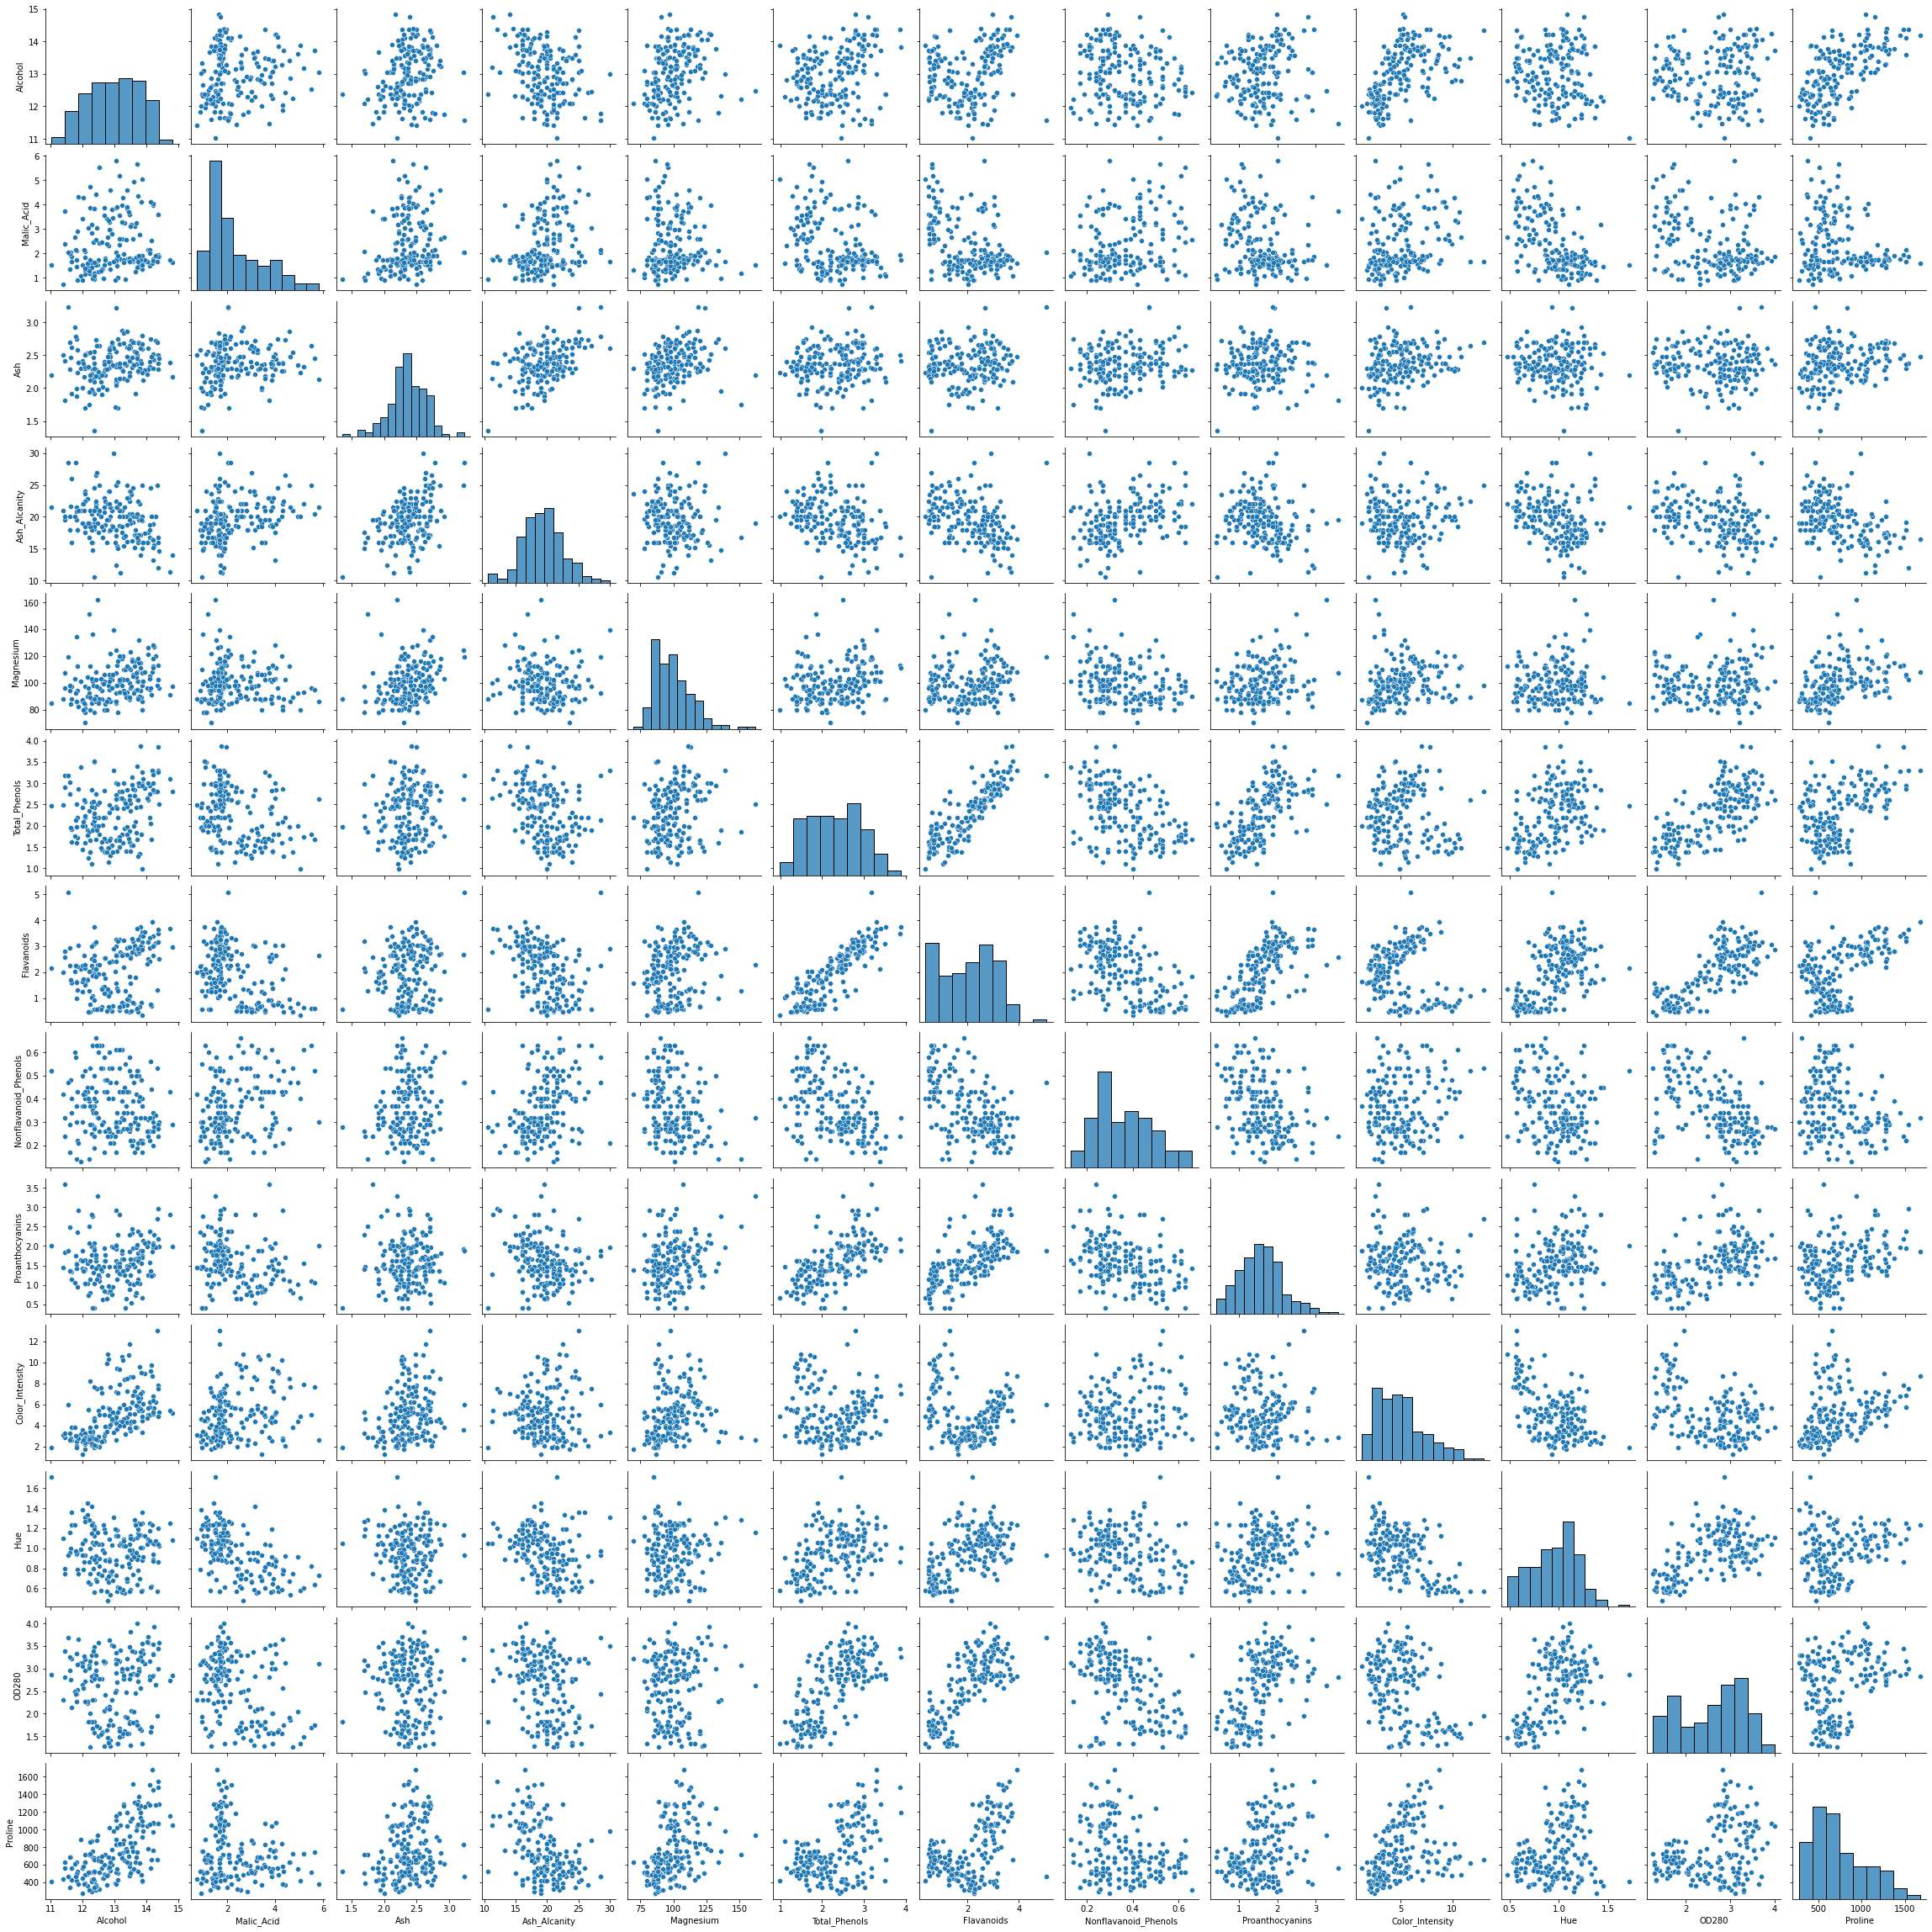

In [17]:
sns.pairplot(data=data)
plt.show()

### Scaling the dataset

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data = sc.fit_transform(data)
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [19]:
#creating scaled data as a dataset
scaled_data2=pd.DataFrame(scaled_data,columns=data.columns)

In [20]:
scaled_data2

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1    0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2    0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3    1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4    0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   
..        ...         ...       ...           ...        ...            ...   
173  0.876275    2.974543  0.305159      0.301803  -0.332922      -0.985614   
174  0.493343    1.412609  0.414820      1.052516   0.158572      -0.793334   
175  0.332758    1.744744 -0.389355      0.151661   1.422412      -1.129824   
176  0.209232    0.227694  0.012732      0.151661   1.422412      -1.033684   
177  1.395086    1.583165  1.365208      1.502943  -0.262708      -0.392751   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0      1.034819             -0.659563         1.224884         0.251717   
1      0.733629             -0.820719        -0.544721        -0.293321   
2      1.215533             -0.498407         2.135968         0.269020   
3      1.466525             -0.981875         1.032155         1.186068   
4      0.663351              0.226796         0.401404        -0.319276   
..          ...                   ...              ...              ...   
173   -1.424900              1.274310        -0.930179         1.142811   
174   -1.284344              0.549108        -0.316950         0.969783   
175   -1.344582              0.549108        -0.422075         2.224236   
176   -1.354622              1.354888        -0.229346         1.834923   
177   -1.274305              1.596623        -0.422075         1.791666   

          Hue     OD280   Proline  
0    0.362177  1.847920  1.013009  
1    0.406051  1.113449  0.965242  
2    0.318304  0.788587  1.395148  
3   -0.427544  1.184071  2.334574  
4    0.362177  0.449601 -0.037874  
..        ...       ...       ...  
173 -1.392758 -1.231206 -0.021952  
174 -1.129518 -1.485445  0.009893  
175 -1.612125 -1.485445  0.280575  
176 -1.568252 -1.400699  0.296498  
177 -1.524378 -1.428948 -0.595160  

[178 rows x 13 columns]


### Before Clusttering the points are plotted

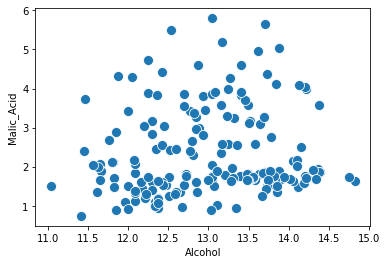

In [21]:
# Scatterplot without clustering(2 features are selected  at random)
ax= sns.scatterplot(data=data,
              x=data['Alcohol'],
              y=data['Malic_Acid'],
              s=100    )

# CLUSTERING MODELS

## Model 1- kMeans Clustering

In [22]:
from sklearn.cluster import KMeans

### Using Elbow method to find the optimum k Value

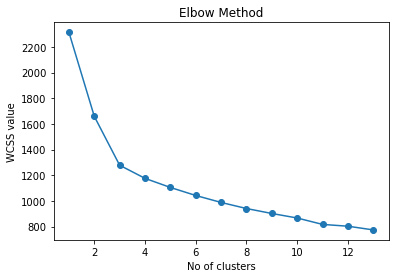

In [23]:
wcss=[]
for i in range(1,14):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,14),wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS value')
plt.show()

### From the Elbow Method Optimum number of clusters is obtained as 3

### Creating a model with optimum cluster (3)

In [24]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(scaled_data)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [25]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(scaled_data,y_kmeans)
print(sil_avg)

0.2848589191898987


### Silhouette score is obtained as 0.28485 from the  model

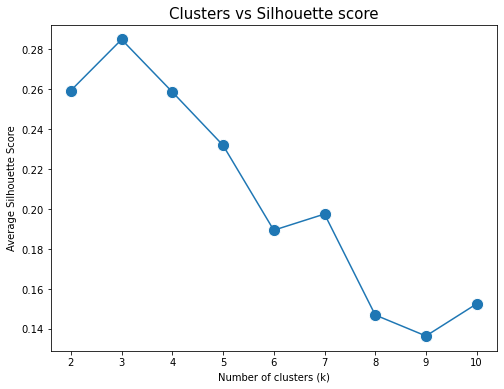

In [26]:
silhouette= []
for k in range(2,11):
    km=KMeans(n_clusters=k,n_init=25,random_state=123)
    km.fit(scaled_data)
    silhouette.append(silhouette_score(scaled_data,km.labels_))

silhouette_series =pd.Series(silhouette,index= range(2,11))    

plt.figure(figsize=(8,6))
ax=sns.lineplot(y= silhouette_series, x= silhouette_series.index)
ax=sns.scatterplot(y=silhouette_series,x= silhouette_series.index, s=150)
ax=ax.set(xlabel='Number of clusters (k)',ylabel='Average Silhouette Score')
plt.title('Clusters vs Silhouette score',fontsize=15)
plt.show()

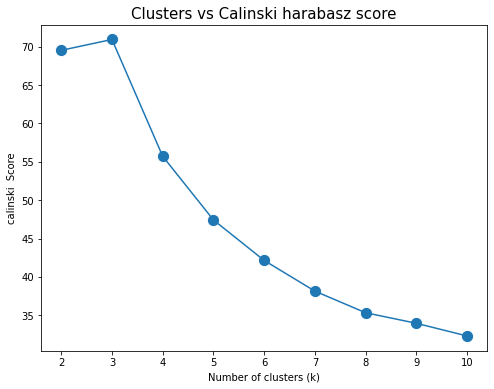

In [27]:
from sklearn.metrics import calinski_harabasz_score
calinski=[]
for k in range(2,11):
    km=KMeans(n_clusters=k,n_init=25,random_state=1234)
    km.fit(scaled_data)
    calinski.append(calinski_harabasz_score(scaled_data,km.labels_))

calinski_series =pd.Series(calinski,index= range(2,11))
plt.figure(figsize=(8,6))
ax=sns.lineplot(y= calinski_series, x= calinski_series.index)
ax=sns.scatterplot(y=calinski_series,x= calinski_series.index, s=150)
ax=ax.set(xlabel='Number of clusters (k)',ylabel='calinski  Score')
plt.title('Clusters vs Calinski harabasz score',fontsize=15)
plt.show()

### From both Silhoutte score and Calinski harabasz score it is confirmed that optimum number of clusters is 3

## Same Datapoints are checked after clustering

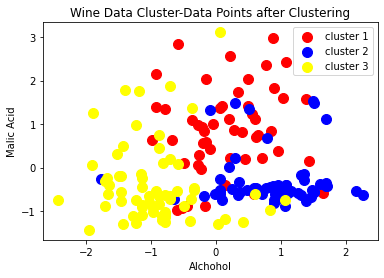

In [28]:
plt.scatter(scaled_data[y_kmeans==0,0],scaled_data[y_kmeans==0,1],s=100,c='red',label='cluster 1')
plt.scatter(scaled_data[y_kmeans==1,0],scaled_data[y_kmeans==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(scaled_data[y_kmeans==2,0],scaled_data[y_kmeans==2,1],s=100,c='yellow',label='cluster 3')
plt.title('Wine Data Cluster-Data Points after Clustering')
plt.xlabel('Alchohol')
plt.ylabel('Malic Acid')
plt.legend()
plt.show()

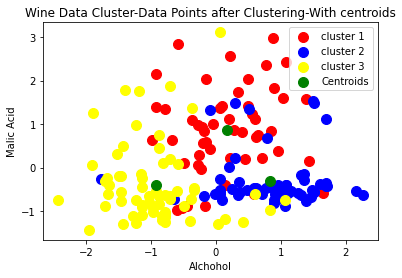

In [29]:
plt.scatter(scaled_data[y_kmeans==0,0],scaled_data[y_kmeans==0,1],s=100,c='red',label='cluster 1')
plt.scatter(scaled_data[y_kmeans==1,0],scaled_data[y_kmeans==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(scaled_data[y_kmeans==2,0],scaled_data[y_kmeans==2,1],s=100,c='yellow',label='cluster 3')
###Plotting the centroid of the clusters:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c ='green', label = 'Centroids')
plt.title('Wine Data Cluster-Data Points after Clustering-With centroids')
plt.xlabel('Alchohol')
plt.ylabel('Malic Acid')
plt.legend()
plt.show()

### So the figures represent the Datapoints after clustering

## Creating Model after PCA (Prinicipal component Analysis)

In [30]:
#Creating a PCA model with random components as 3
pca = PCA(n_components=3)
pca.fit(data)
pca_scale = pca.transform(data)
pca_df = pd.DataFrame(pca_scale, columns=['pc1', 'pc2', 'pc3'])

In [31]:
kmeans2=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans2=kmeans2.fit_predict(pca_df)
y_kmeans2

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [32]:
from sklearn.metrics import silhouette_score
sil_avg2=silhouette_score(pca_df,y_kmeans2)
print(sil_avg2)

0.5716547257508234


### So silhouette score after pca is obtained as  0.571. So PCA(Principal Component Analysis) improves silhouette score of the model

***

# Model 2 - Agglomerative Hierarchical Clustering

In [33]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage,dendrogram

### Plotting Dendogram to decide optimum number of clusters

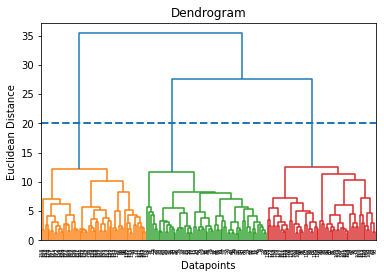

In [34]:
dendrogram=sch.dendrogram(sch.linkage(scaled_data,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Datapoints')
plt.ylabel('Euclidean Distance')
plt.hlines(y=20,xmin=0,xmax=2000,lw=2,linestyles='--')
plt.xticks(rotation=90)
plt.show()

### Optimum number of clusters is obtained as 3 from dendrogram

### Taking number of clusters as 3 Agglomerative clustering Model is built

In [35]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(scaled_data)
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [36]:
sil_avg3=silhouette_score(scaled_data,y_hc)
print(sil_avg3)

0.2774439826952265


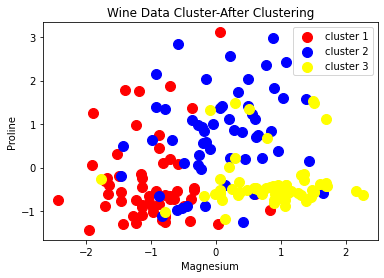

In [37]:
plt.scatter(scaled_data[y_hc==0,0],scaled_data[y_hc==0,1],s=100,c='red',label='cluster 1')
plt.scatter(scaled_data[y_hc==1,0],scaled_data[y_hc==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(scaled_data[y_hc==2,0],scaled_data[y_hc==2,1],s=100,c='yellow',label='cluster 3')
plt.title('Wine Data Cluster-After Clustering')
plt.xlabel('Magnesium')
plt.ylabel('Proline')
plt.legend()
plt.show()

### Creating Model after PCA (Prinicipal component Analysis) in Agglomerative Hierarchial Clustering

In [38]:
pca = PCA(n_components=3)
pca.fit(data)
pca_scale = pca.transform(data)
pca_df = pd.DataFrame(pca_scale, columns=['pc1', 'pc2', 'pc3'])

In [39]:
hc2=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc2=hc2.fit_predict(pca_df)
y_hc2

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

In [40]:
sil_avg4=silhouette_score(pca_df,y_hc2)
print(sil_avg4)

0.5649842648306251


### Silhouette score is improved after trying PCA in the AHC model

***

# Model 3- DB Scan Clustering

## Feature Reduction

In [41]:
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
plt.style.use('fivethirtyeight')

### Principal Component Analysis 

In [42]:
from sklearn.decomposition import PCA

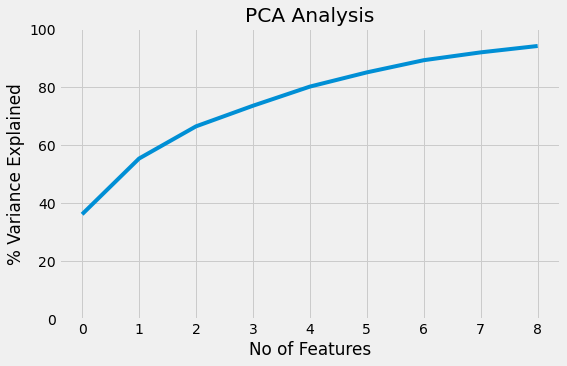

In [43]:
pca = PCA(n_components=9)
pca.fit(scaled_data)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(8,5))
plt.ylabel('% Variance Explained')
plt.xlabel('No of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)
plt.show()

### From the PCA no of features is taken as 3 as it includes almost 70% variance in data

In [44]:
pca = PCA(n_components=3)
pca.fit(scaled_data)
pca_scale = pca.transform(scaled_data)
pca_df = pd.DataFrame(pca_scale, columns=['pc1', 'pc2', 'pc3'])
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631]


In [45]:
pca_df

pc1       pc2       pc3
0    3.316751 -1.443463 -0.165739
1    2.209465  0.333393 -2.026457
2    2.516740 -1.031151  0.982819
3    3.757066 -2.756372 -0.176192
4    1.008908 -0.869831  2.026688
..        ...       ...       ...
173 -3.370524 -2.216289 -0.342570
174 -2.601956 -1.757229  0.207581
175 -2.677839 -2.760899 -0.940942
176 -2.387017 -2.297347 -0.550696
177 -3.208758 -2.768920  1.013914

[178 rows x 3 columns]

### Determining the optimum Epsilon value for the dbScan Model

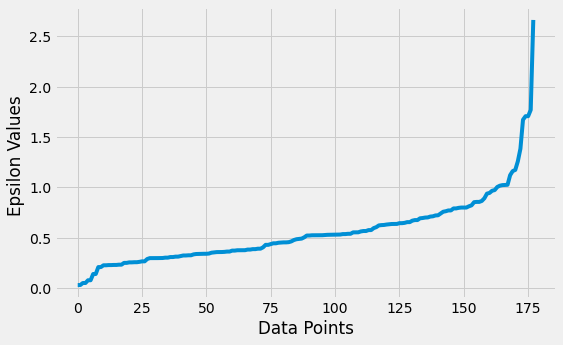

In [46]:
plt.figure(figsize=(8,5))
nn = NearestNeighbors(n_neighbors=5).fit(pca_df)
distances, idx = nn.kneighbors(pca_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("Epsilon Values ")
plt.show()

### Optimum value of Epsilon is taken as 1.3 from the graph (Similar to elbow method)

In [47]:
from sklearn import metrics

### Calculating the Feature of dBscan Model

In [48]:
db = DBSCAN(eps=1.3, min_samples=16).fit(pca_df)
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette score: %0.3f" % metrics.silhouette_score(pca_df, labels))

Estimated number of clusters: 3
Estimated number of noise points: 24
Silhouette score: 0.387


## Fine Tuning the Dbscan model

In [49]:
from itertools import product

### Checking the silhoutte score for different epsilon and Minimum points 

In [50]:
pca_eps_values = np.arange(1,1.3,0.1) 
pca_min_samples = np.arange(2,17) 
pca_dbscan_params = list(product(pca_eps_values, pca_min_samples))
pca_no_of_clusters = []
pca_sil_score = []
pca_epsvalues = []
pca_min_samp = []
for p in pca_dbscan_params:
    pca_dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(pca_df)
    pca_epsvalues.append(p[0])
    pca_min_samp.append(p[1])
    pca_min_samp.append(p[1])
    pca_no_of_clusters.append(len(np.unique(pca_dbscan_cluster.labels_)))
    pca_sil_score
    pca_sil_score.append(silhouette_score(pca_df, pca_dbscan_cluster.labels_))
pca_eps_min = list(zip(pca_no_of_clusters, pca_sil_score, pca_epsvalues, pca_min_samp))
pca_eps_min_df = pd.DataFrame(pca_eps_min, columns=['no_of_clusters', 'silhouette_score', 'epsilon_values', 'minimum_points'])
pca_eps_min_df

no_of_clusters  silhouette_score  epsilon_values  minimum_points
0                5         -0.192687             1.0               2
1                2          0.142303             1.0               2
2                2          0.142303             1.0               3
3                3          0.288728             1.0               3
4                3          0.274161             1.0               4
5                3          0.257037             1.0               4
6                3          0.236946             1.0               5
7                4          0.327594             1.0               5
8                4          0.303265             1.0               6
9                5          0.177305             1.0               6
10               4          0.204065             1.0               7
11               4          0.165460             1.0               7
12               4          0.134371             1.0               8
13               3          0.198863             1.0               8
14               3          0.179024             1.0               9
15               3          0.021911             1.1               9
16               2          0.209510             1.1              10
17               2          0.205533             1.1              10
18               2          0.186648             1.1              11
19               2          0.165099             1.1              11
20               2          0.147200             1.1              12
21               2          0.141778             1.1              12
22               3          0.277218             1.1              13
23               3          0.266084             1.1              13
24               4          0.362589             1.1              14
25               4          0.330558             1.1              14
26               4          0.314369             1.1              15
27               4          0.265231             1.1              15
28               4          0.226411             1.1              16
29               4          0.202470             1.1              16
30               2          0.247091             1.2               2
31               2          0.247091             1.2               2
32               2          0.209570             1.2               3
33               2          0.186000             1.2               3
34               2          0.180012             1.2               4
35               2          0.167171             1.2               4
36               2          0.167171             1.2               5
37               2          0.142212             1.2               5
38               3          0.302260             1.2               6
39               3          0.286546             1.2               6
40               3          0.273059             1.2               7
41               4          0.378671             1.2               7
42               4          0.366320             1.2               8
43               4          0.328270             1.2               8
44               4          0.293198             1.2               9
45               2          0.279174             1.3               9
46               2          0.279174             1.3              10
47               2          0.255718             1.3              10
48               2          0.255718             1.3              11
49               2          0.238046             1.3              11
50               2          0.208815             1.3              12
51               2          0.208815             1.3              12
52               2          0.187938             1.3              13
53               2          0.187938             1.3              13
54               3          0.347160             1.3              14
55               3          0.328729             1.3              14
56               3          0.328729             1.3              15
57

### From the table optimum number of clusters is taken as  3 as for the combination of 1.3 epsilon and 16 minimum points .

In [51]:
dbscan = DBSCAN(eps=1.3, min_samples=16)
y_db=dbscan.fit_predict(pca_df)
y_db

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  2, -1,  1,  1,  0, -1,  1,
        1, -1,  1, -1,  1, -1,  0,  1, -1,  1,  0,  1,  1,  0,  1,  2,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  0,  1,  1,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  0,  1, -1,  1,  1, -1,  1,  1,  2,
        1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  2,  2,  2,  2,  2,  2,
        2, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2, -1], dtype=int64)

In [52]:
from sklearn.metrics import silhouette_score
sil_avg5=silhouette_score(pca_df,y_db)
print(sil_avg5)

0.38664319007711906


### So silhouette score is obtained as 0.38 after PCA in DB Scan model

### Calculating the silhouette score without PCA in DB scan model

In [53]:
from sklearn.metrics import silhouette_score
sil_avg6=silhouette_score(scaled_data,y_db)
print(sil_avg6)

0.23153779495809648


### Creating a dataframe with silhouette_score  of all models

In [54]:
#Creating a dataframe with silhouette_score 
score={'Model Name':['kMeans','ACH','DB Scan',],'silhouette score without PCA':[sil_avg,sil_avg3,sil_avg6],'silhouette score after PCA':[sil_avg2,sil_avg4,sil_avg5]}
df=pd.DataFrame(score)
df=df.set_index('Model Name')
df

silhouette score without PCA  silhouette score after PCA
Model Name                                                          
kMeans                          0.284859                    0.571655
ACH                             0.277444                    0.564984
DB Scan                         0.231538                    0.386643

### So analysing all the models the optimum number of cluster is obtained as 3. Comparing the silhouette_score of all 3 models,the best silhouette score is obtained  after PCA in all 3 models. 

***
***